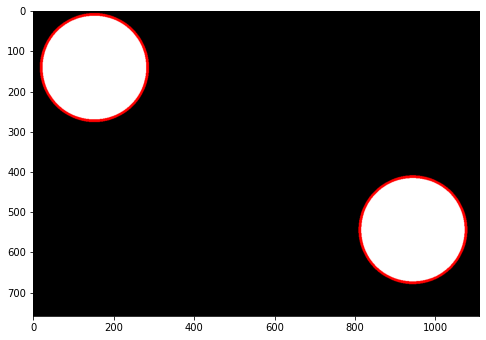

In [2]:
#recarregando o nosso exemplo...

%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('NAC.png')

img2 = cv2.imread('hsv_colorspace.png')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Definição dos valores minimo e max da mascara
# o magenta tem h=300 mais ou menos ou 150 para a OpenCV
# 173°, 65%, 89%
# 0°, 94%, 69%
image_lower_hsv = np.array([85, 50, 100])
image_upper_hsv = np.array([87, 255, 255])



lower_red = np.array([175,150,100])
upper_red = np.array([180,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([0,150,100])
upper_red = np.array([5,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# juntando mascaras do vermelho
maskRed = mask0+mask1

mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

# juntando mascara do vermelho e do verde
maskFinal = maskRed+mask_hsv
contornos, _ = cv2.findContours(maskFinal, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

mask_rgb = cv2.cvtColor(maskFinal, cv2.COLOR_GRAY2RGB)

contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);

plt.figure(figsize=(8,6))
plt.imshow(contornos_img, cmap='gray');



{'m00': 54633.5, 'm10': 51521705.33333333, 'm01': 29668640.833333332, 'm20': 48824655346.75, 'm11': 27978698240.625, 'm02': 16349061495.916666, 'm30': 46491666505483.7, 'm21': 26513994085136.9, 'm12': 15417768393700.732, 'm03': 9136334102187.451, 'mu20': 237504231.5033493, 'mu11': -87132.00353240967, 'mu02': 237550263.84597778, 'mu30': -5304645.28125, 'mu21': 2030533.1940917969, 'mu12': 5323552.774230957, 'mu03': -2035900.9140625, 'nu20': 0.0795707230025284, 'nu11': -2.9191717864761178e-05, 'nu02': 0.0795861451563202, 'nu30': -7.603416638916061e-06, 'nu21': 2.9104660265221095e-06, 'nu12': 7.630517705831834e-06, 'nu03': -2.9181598513066895e-06}


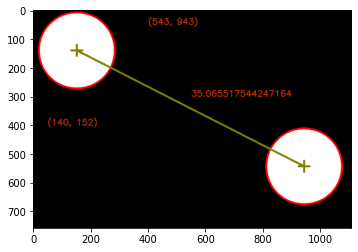

In [2]:
import math

## para desenhar a cruz vamos passar a cor e o tamanho em pixel
size = 20
color = (128,128,0)

cnt = contornos[0]
cnt2 = contornos[1]

M = cv2.moments(cnt)
M2 = cv2.moments(cnt2)
print( M )

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

# print("centro de massa na possição: ",cx, cy)

cx2 = int(M2['m10']/M2['m00'])
cy2 = int(M2['m01']/M2['m00'])

cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

cv2.line(contornos_img,(cx2 - size,cy2),(cx2 + size,cy2),color,5)
cv2.line(contornos_img,(cx2,cy2 - size),(cx2, cy2 + size),color,5)


cv2.line(contornos_img,(cx2 , cy2),(cx , cy),color,5)


font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem = (400,50)

text2 = cy2 , cx2
origem2 = (50,400)

angulo1 = math.atan2(cy , cx)
angulo2 = math.atan2(cy2 , cx2)
anguloTang = math.atan2(angulo1, angulo2)

anguloDegrees = math.degrees(anguloTang)


cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)
cv2.putText(contornos_img, str(text2), origem2, font,1,(200,50,0),2,cv2.LINE_AA)
cv2.putText(contornos_img, str(anguloDegrees), (550, 300), font,1,(200,50,0),2,cv2.LINE_AA)

plt.imshow(contornos_img);

In [3]:
#!/usr/bin/python
# -- coding: utf-8 --

# Programa simples com camera webcam e opencv

import cv2
import os,sys, os.path
import numpy as np
import math


def image_da_webcam(img):
    """
    ->>> !!!! FECHE A JANELA COM A TECLA ESC !!!! <<<<-
        deve receber a imagem da camera e retornar uma imagems filtrada.
    """
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    return img

cv2.namedWindow("preview")
vc = cv2.VideoCapture(0)


if vc.isOpened(): # try to get the first frame
    rval, frame = vc.read()
else:
    rval = False

while rval:
    
    img = image_da_webcam(frame)

    img2 = cv2.imread('hsv_colorspace.png')
    img2 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Definição dos valores minimo e max da mascara
    # o magenta tem h=300 mais ou menos ou 150 para a OpenCV
    # 173°, 65%, 89%
    # 0°, 94%, 69%
    image_lower_hsv = np.array([85, 150, 100])
    image_upper_hsv = np.array([87, 255, 255])



    lower_red = np.array([175,150,100])
    upper_red = np.array([180,255,255])
    mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([0,150,100])
    upper_red = np.array([5,255,255])
    mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

    # juntando mascaras do vermelho
    maskRed = mask0+mask1

    mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

    # juntando mascara do vermelho e do verde
    maskFinal = maskRed+mask_hsv
    contornos, _ = cv2.findContours(maskFinal, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

    mask_rgb = cv2.cvtColor(maskFinal, cv2.COLOR_GRAY2RGB)

    contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

    cv2.drawContours(frame, contornos, -1, [255, 0, 0], 5);

    cv2.imshow("preview", frame)

    rval, frame = vc.read()
    key = cv2.waitKey(20)
    if key == 27: # exit on ESC
        break

cv2.destroyWindow("preview")
vc.release()